. Import Libraries:

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


. Load Dataset:

In [176]:
df1=pd.read_csv('iris.csv')
df1.shape

(150, 5)

In [177]:
type(df1)

pandas.core.frame.DataFrame

# **. Data Exploration:**

There are 150 Rows and 5 Columns,need to know more about columns using info() and describe() method

In [178]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


 only one column has categorical data and all the other columns are numeric type with non-Null entries.

In [179]:
df1.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Statics shows the count of each column along with their mean value, standard deviation, minimum and maximum values.

# **Checking Missing Value**

Check data if contains any missing values or not.

In [180]:
df1.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

NO column has any missing value


# **Checking Duplicates**

In [181]:
data = df1.drop_duplicates(subset ="variety",)
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
50,7.0,3.2,4.7,1.4,Versicolor
100,6.3,3.3,6.0,2.5,Virginica


The are 3 different Unique variety (Setosa/	Versicolor/Virginica)

# **Check for Balanced Data**

In [182]:
df1.value_counts("variety")

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

all the variety contain an equal amount of rows

Display fist 10 Recors

In [183]:
df1[0:10]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


# **Data Visualization**

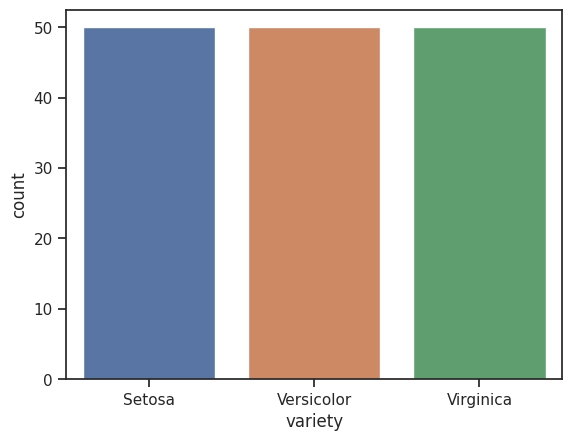

In [184]:

sns.countplot(x='variety', data=df1, )
plt.show()

# **Relation between features (Variables)**

Comparing Sepal Length and Sepal Width

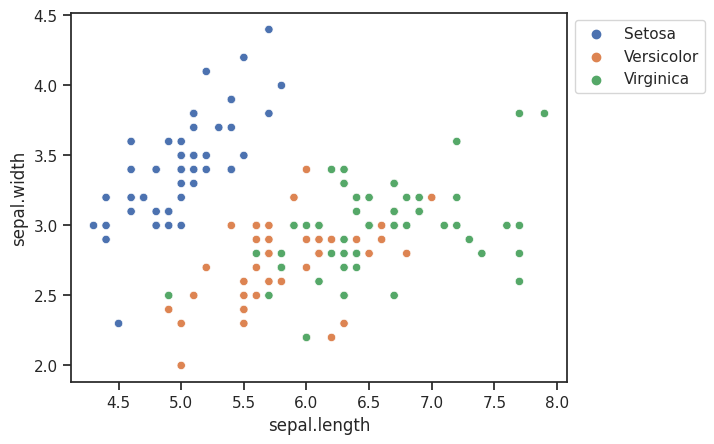

In [185]:
sns.scatterplot(x='sepal.length', y='sepal.width',
                hue='variety', data=df1, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

Comparing Petal Length and Petal Width

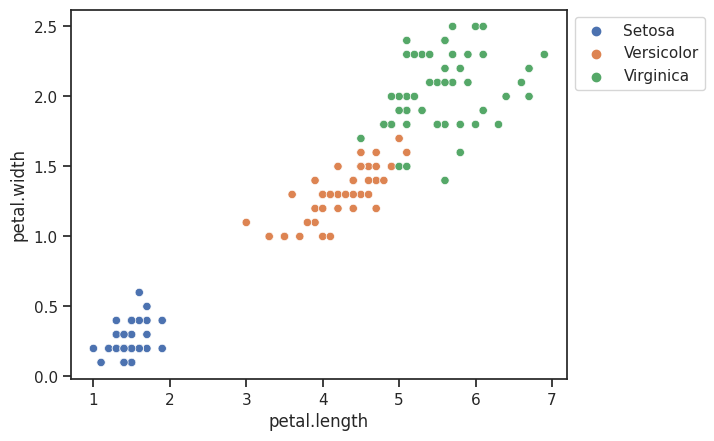

In [186]:
sns.scatterplot(x='petal.length', y='petal.width',
                hue='variety', data=df1, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

# **plot all the column’s relationships using a pairplot**

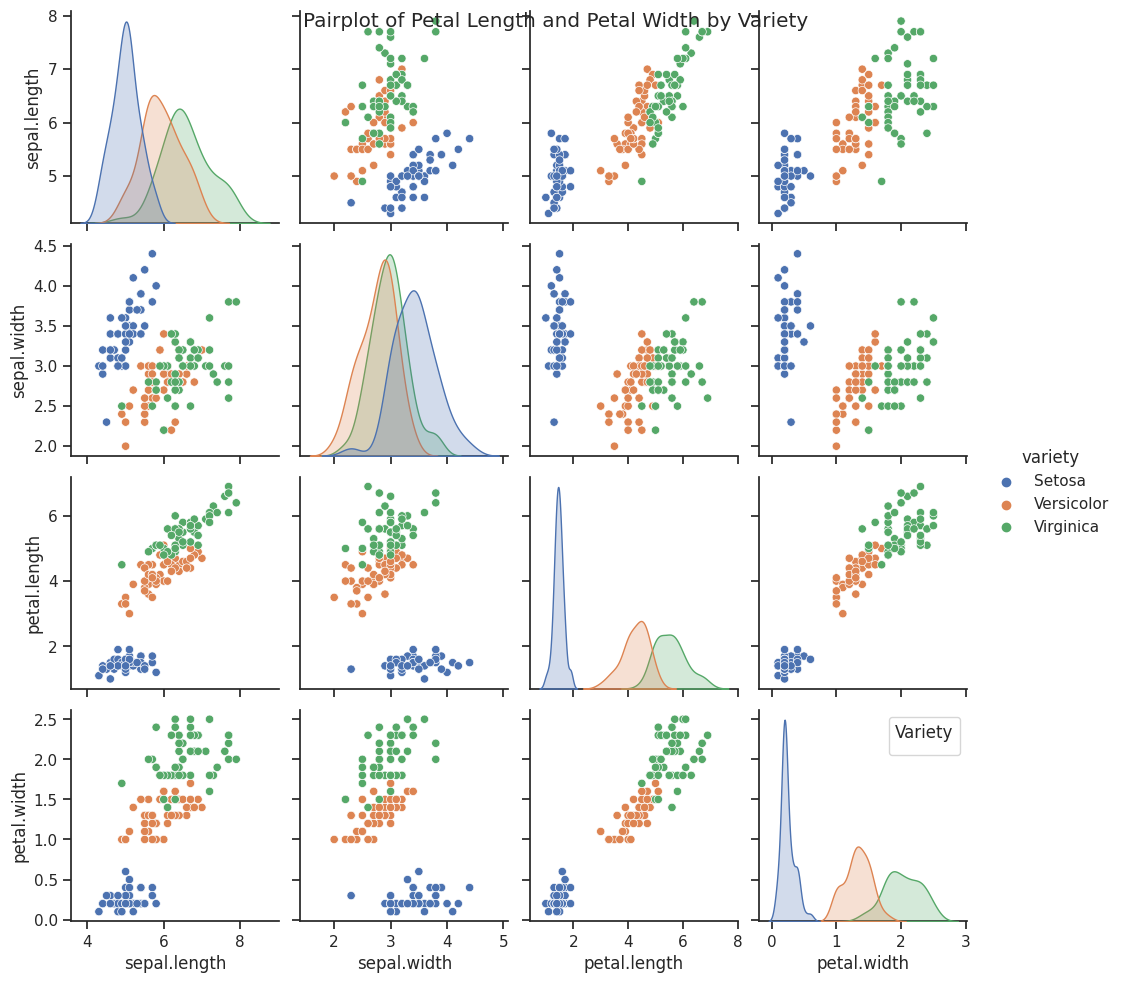

In [187]:
sns.set(style="ticks")  # Set the style for the plot

# Filter the DataFrame for each variety
setosa_data = df1[df1["variety"] == "Setosa"]
versicolor_data = df1[df1["variety"] == "Versicolor"]
virginica_data = df1[df1["variety"] == "Virginica"]

# Combine the data from all varieties
combined_data = pd.concat([setosa_data, versicolor_data, virginica_data])

# Create a pairplot
sns.pairplot(combined_data, hue="variety", diag_kind="kde")

# Add a legend
plt.legend(title="Variety")

# Set the title
plt.suptitle("Pairplot of Petal Length and Petal Width by Variety")

# Show the plot
plt.show()

# **Histograms**

(array([48.,  2., 15., 37., 25., 23.]),
 array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5]),
 <BarContainer object of 6 artists>)

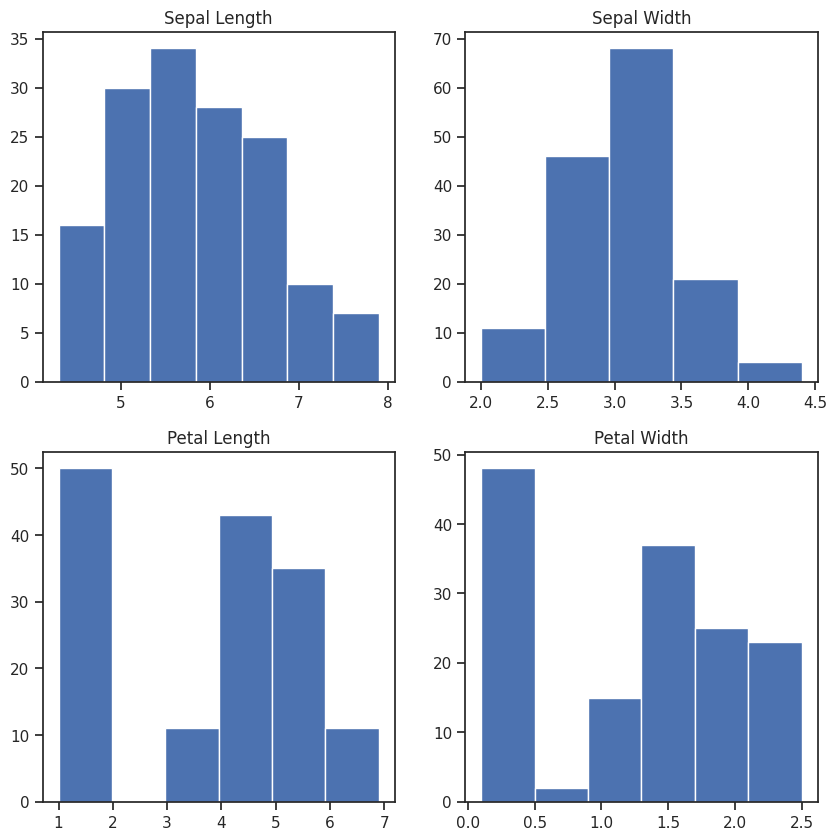

In [188]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df1['sepal.length'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df1['sepal.width'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df1['petal.length'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df1['petal.width'], bins=6)

# **Histograms with Distplot Plot**

The distplot function  is used to visualize the distribution of a dataset using a combination of a histogram and a kernel density estimate (KDE) plot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

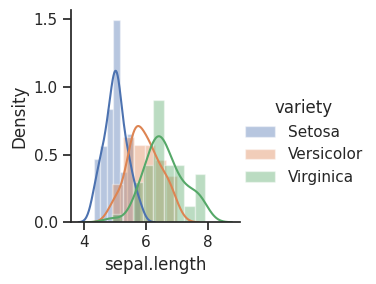

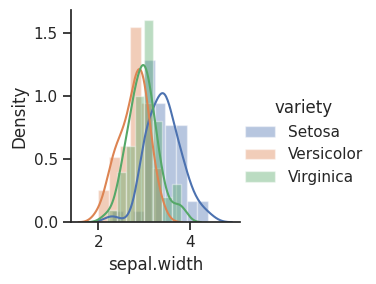

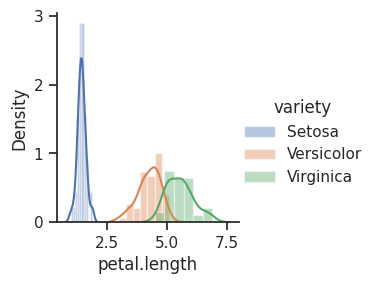

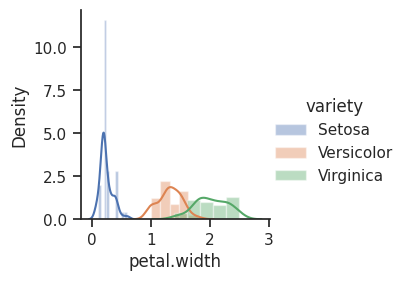

In [189]:
plot = sns.FacetGrid(df1, hue="variety")
plot.map(sns.distplot, "sepal.length").add_legend()

plot = sns.FacetGrid(df1, hue="variety")
plot.map(sns.distplot, "sepal.width").add_legend()

plot = sns.FacetGrid(df1, hue="variety")
plot.map(sns.distplot, "petal.length").add_legend()

plot = sns.FacetGrid(df1, hue="variety")
plot.map(sns.distplot, "petal.width").add_legend()

plt.show()

# **Heatmaps**

<ipython-input-190-bade131dd23f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True)


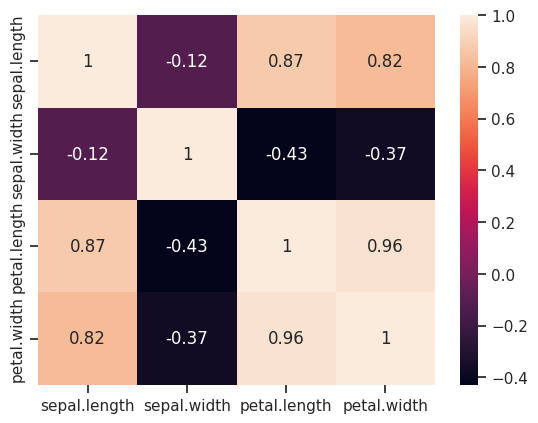

In [190]:
sns.heatmap(df1.corr(), annot=True)
plt.show()

. Scatter Plots using Different Libraries:


. 3D Scatter Plot:

# **BOX Plot**

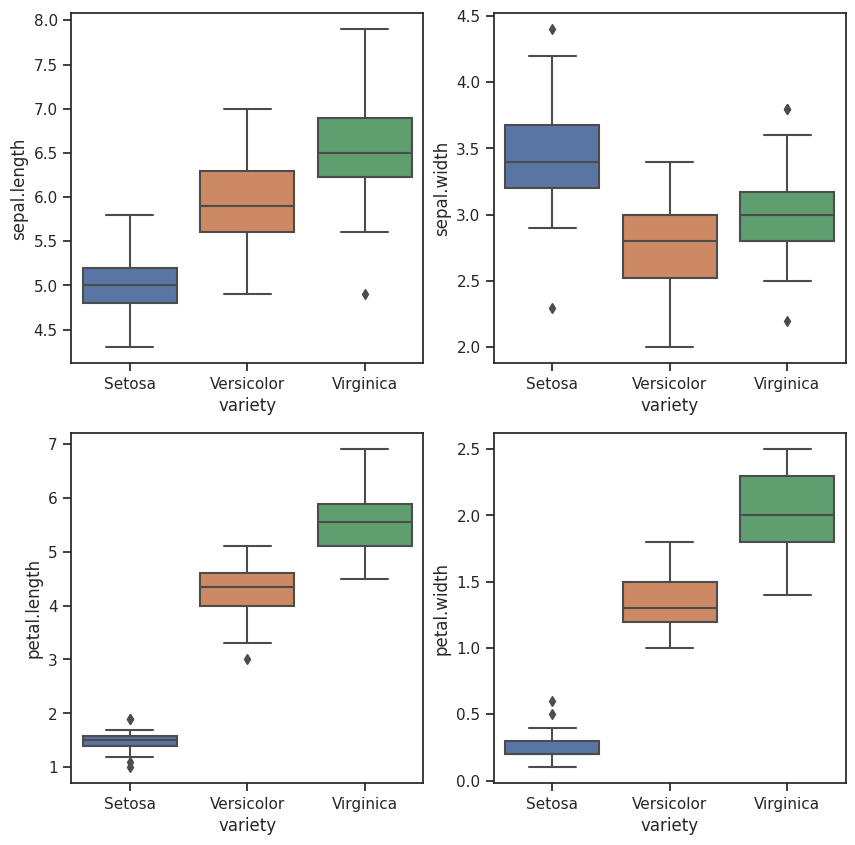

In [191]:
def graph(y):
    sns.boxplot(x="variety", y=y, data=df1)

plt.figure(figsize=(10,10))

# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('sepal.length')

plt.subplot(222)
graph('sepal.width')

plt.subplot(223)
graph('petal.length')

plt.subplot(224)
graph('petal.width')

plt.show()

# **Handling Outliers**

<Axes: xlabel='sepal.width'>

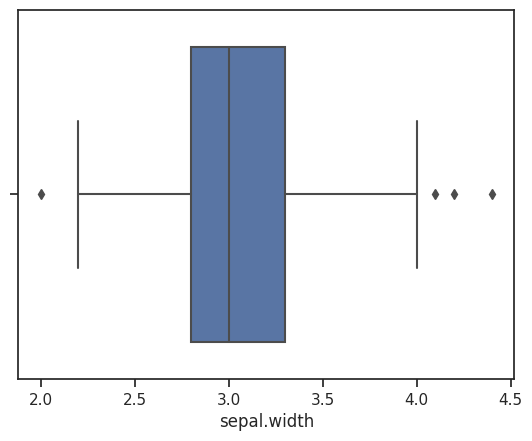

In [192]:
sns.boxplot(x='sepal.width', data=df1)

Old Shape:  (150, 5)
New Shape:  (146, 5)


<ipython-input-198-2d7759d0c450>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df1['sepal.width'], 25, interpolation='midpoint')
<ipython-input-198-2d7759d0c450>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df1['sepal.width'], 75, interpolation='midpoint')


<Axes: xlabel='sepal.width'>

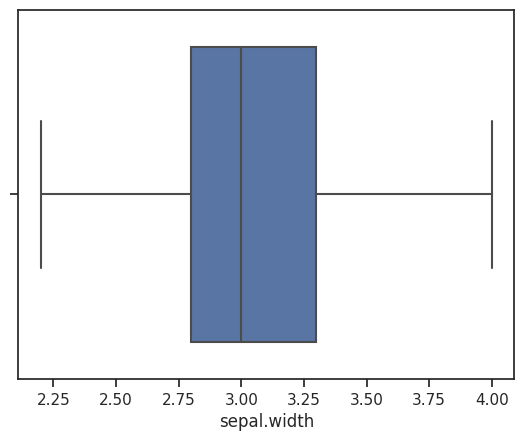

In [198]:
# IQR
Q1 = np.percentile(df1['sepal.width'], 25, interpolation='midpoint')
Q3 = np.percentile(df1['sepal.width'], 75, interpolation='midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df1.shape)

# Upper bound
upper = np.where(df1['sepal.width'] >= (Q3 + 1.5 * IQR))

# Lower bound
lower = np.where(df1['sepal.width'] <= (Q1 - 1.5 * IQR))

# Removing the Outliers
df1.drop(upper[0], inplace=True)
df1.drop(lower[0], inplace=True)

print("New Shape: ", df1.shape)

sns.boxplot(x='sepal.width', data=df1)

# **K-Means**

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid

In [196]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


# Drop the non-numeric column
df_numeric = df1.drop('variety', axis=1)

# Create a OneHotEncoder instance
encoder = OneHotEncoder()

# Fit and transform the encoder on the categorical data
categorical_data = df1[['variety']]
encoded_categorical = encoder.fit_transform(categorical_data).toarray()

# Convert the encoded categorical data into a dataframe
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(['variety']))

# Concatenate the encoded categorical data with the numeric data
final_df = pd.concat([df_numeric, encoded_df], axis=1)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
final_df_imputed = pd.DataFrame(imputer.fit_transform(final_df), columns=final_df.columns)

# using 'final_df_imputed' for clustering
wcss = [] # Your list to store the Within-Cluster-Sum-of-Squares values

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(final_df_imputed)
    wcss.append(kmeans.inertia_)

# **Using Elbow method to determine optional cluster number**

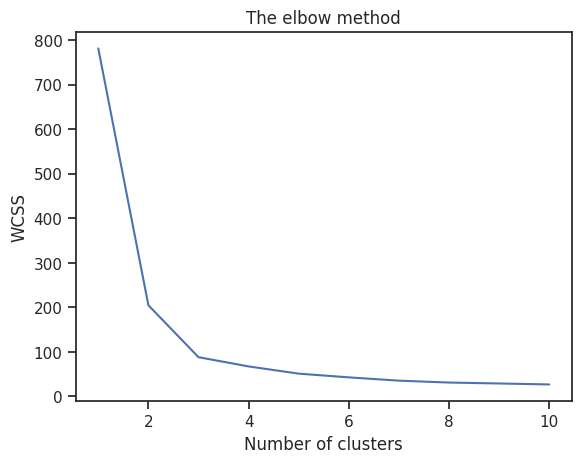

In [194]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# **Implementing K-Means Clustering**

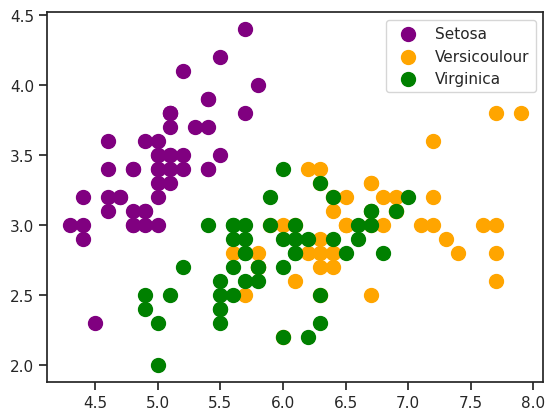

In [195]:

# Drop the non-numeric column (assuming 'species' is the column with labels)
df_numeric = df1.drop('variety', axis=1)

# Create a OneHotEncoder instance
encoder = OneHotEncoder()

# Fit and transform the encoder on the categorical data
categorical_data = df1[['variety']]
encoded_categorical = encoder.fit_transform(categorical_data).toarray()

# Convert the encoded categorical data into a dataframe
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(['variety']))

# Concatenate the encoded categorical data with the numeric data
final_df = pd.concat([df_numeric, encoded_df], axis=1)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
final_df_imputed = pd.DataFrame(imputer.fit_transform(final_df), columns=final_df.columns)

# Perform clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(final_df_imputed)

# Visualize the clusters (assuming your data has 2 features for visualization)
plt.scatter(final_df_imputed.iloc[y_kmeans == 0, 0], final_df_imputed.iloc[y_kmeans == 0, 1], s=100, c='purple', label='Setosa')
plt.scatter(final_df_imputed.iloc[y_kmeans == 1, 0], final_df_imputed.iloc[y_kmeans == 1, 1], s=100, c='orange', label='Versicoulour')
plt.scatter(final_df_imputed.iloc[y_kmeans == 2, 0], final_df_imputed.iloc[y_kmeans == 2, 1], s=100, c='green', label='Virginica')

# show the plot
plt.legend()
plt.show()